# LOG6302A — Analyse d’applications et Cyber-sécurité<br>Laboratoire #4

**Quentin Guidée (2206809), Nam Vu (2230468)**

Polytechnique Montréal – Hiver 2024


# 1. Extraction du DataFlow

In [2]:
import tempfile
from copy import deepcopy

from code_analysis import CFG, CFGReader, Graph
from dataflow import PossibleReachableReferences, PossiblyReachingDefinitions
from graphviz import Source
from IPython.display import Image


def show_graph(graph: Graph):
    """Afficher le graphe dans Jupyter"""
    dot = graph.to_dot()
    s = Source(dot)
    with tempfile.NamedTemporaryFile(suffix=".png") as f:
        s.render(f.name, format="png")
        display(Image(f.name + ".png"))


def show_in_out(
    cfg: CFG, in_dict: dict[int, set[int]], out_dict: dict[int, set[int]]
) -> CFG:
    """Annote un CFG avec les valeurs de in et out pour chaque noeud puis l'affiche"""
    cfg_copy = deepcopy(cfg)
    for nid in cfg_copy.get_node_ids():
        cfg_copy.set_image(
            nid,
            f"in={[cfg.get_image(v) for v in in_dict[nid]]} "
            f"out={[cfg.get_image(v) for v in out_dict[nid]]} "
            f"{cfg_copy.get_image(nid) or ''}",
        )
    show_graph(cfg_copy)
    return cfg_copy


cfg_reader = CFGReader()

defs_dataflow = PossiblyReachingDefinitions()
refs_dataflow = PossibleReachableReferences()

In [3]:
cfg = cfg_reader.read_cfg("../tp4/part_1/test.php.cfg.json")

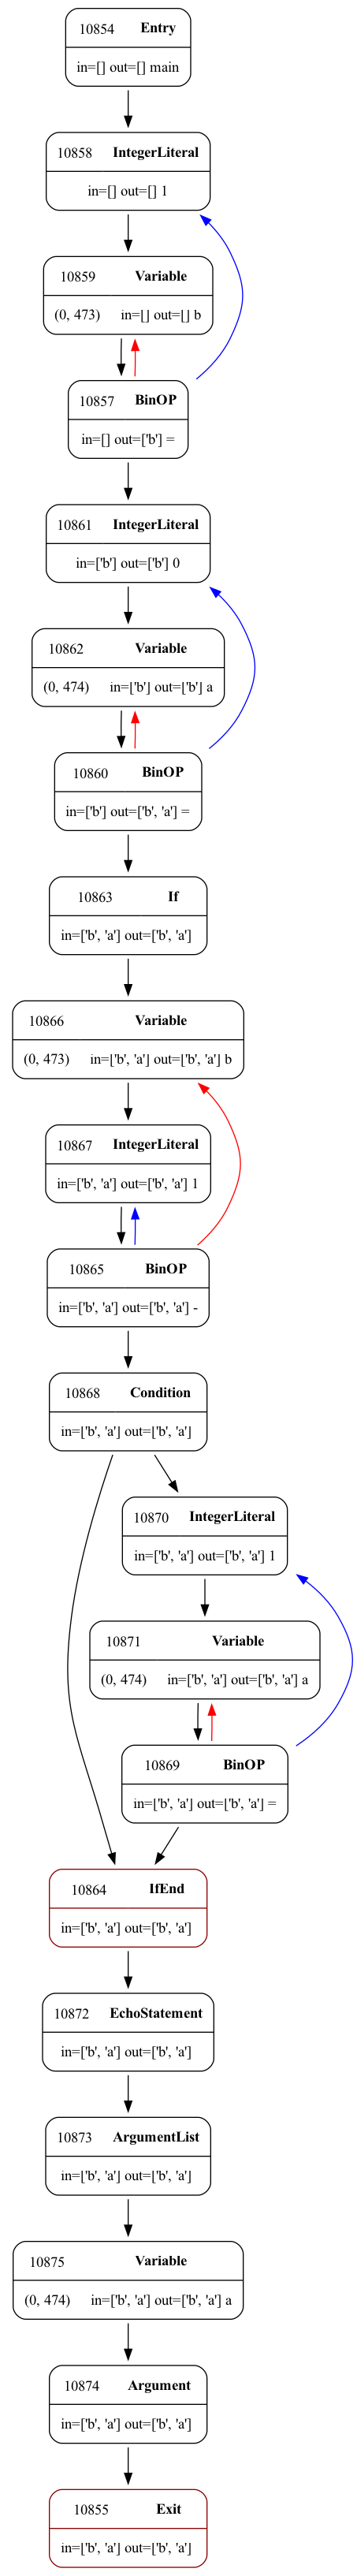

In [4]:
in_dict, out_dict = defs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

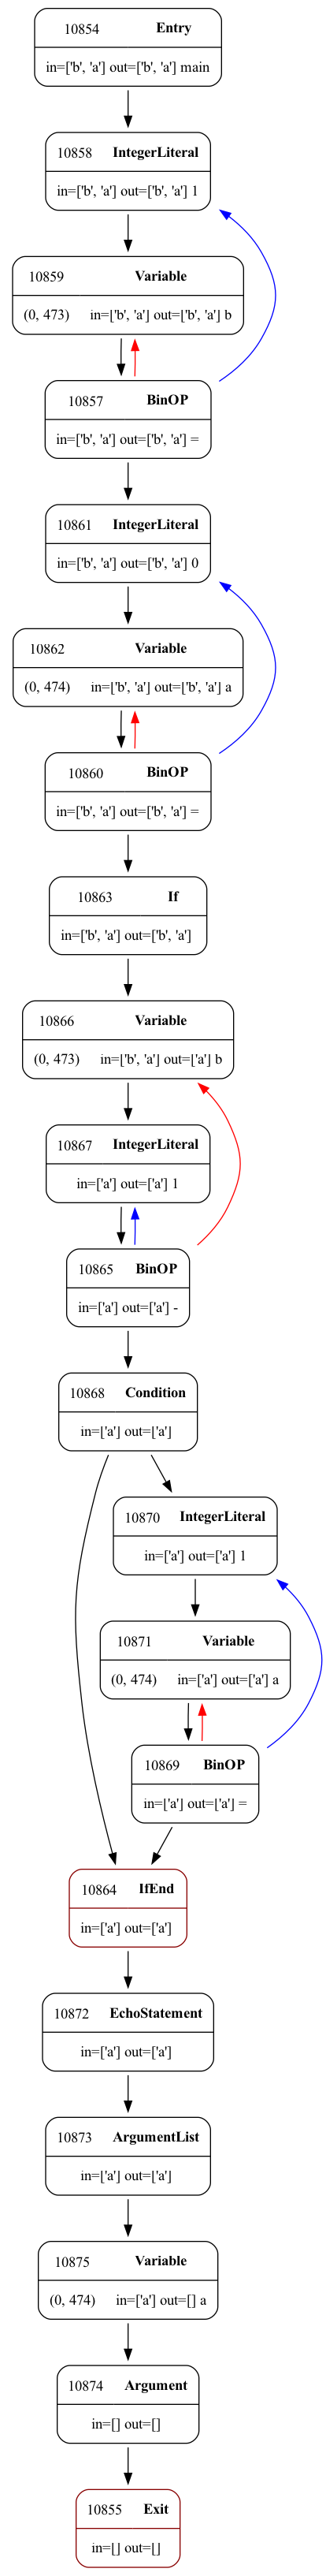

In [5]:
in_dict, out_dict = refs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

In [6]:
cfg = cfg_reader.read_cfg("../tp4/part_1/wordcount.php.cfg.json")

In [7]:
in_dict, out_dict = defs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

In [8]:
in_dict, out_dict = refs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

# 2. Utilisation du DataFlow

In [9]:
cfg = cfg_reader.read_cfg("../tp4/part_2/file1.php.cfg.json")

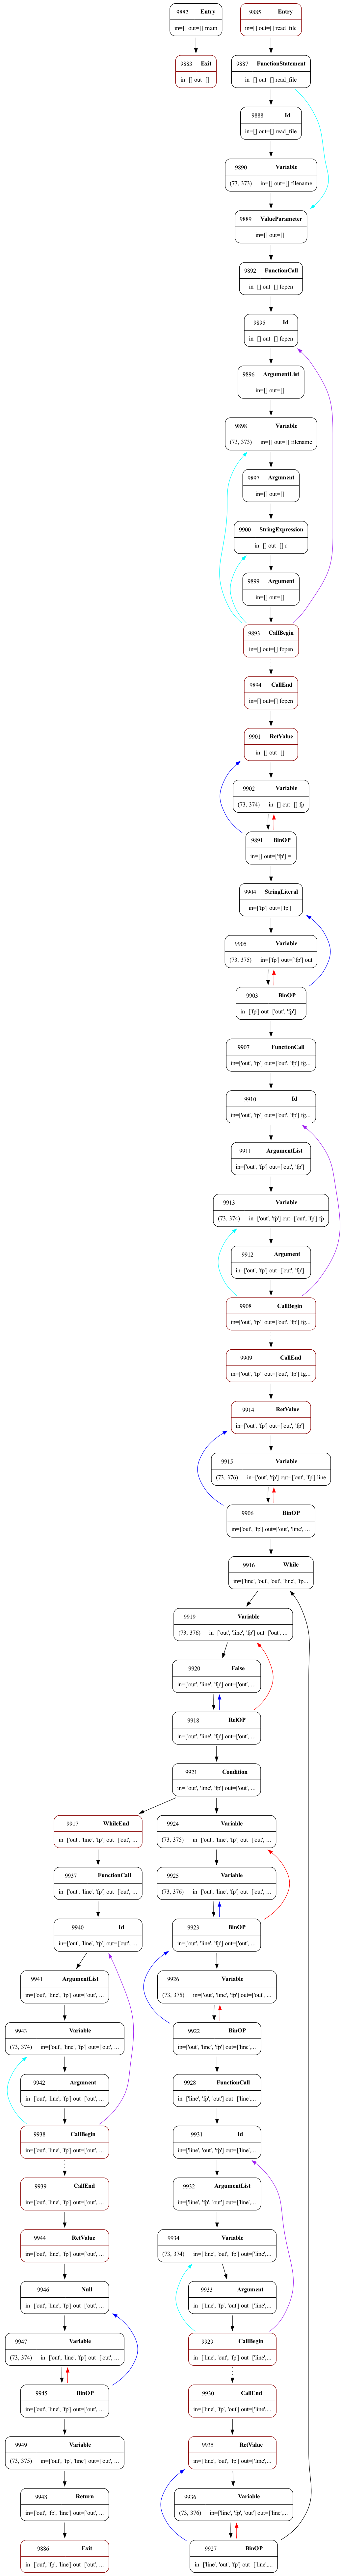

In [10]:
in_dict, out_dict = defs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

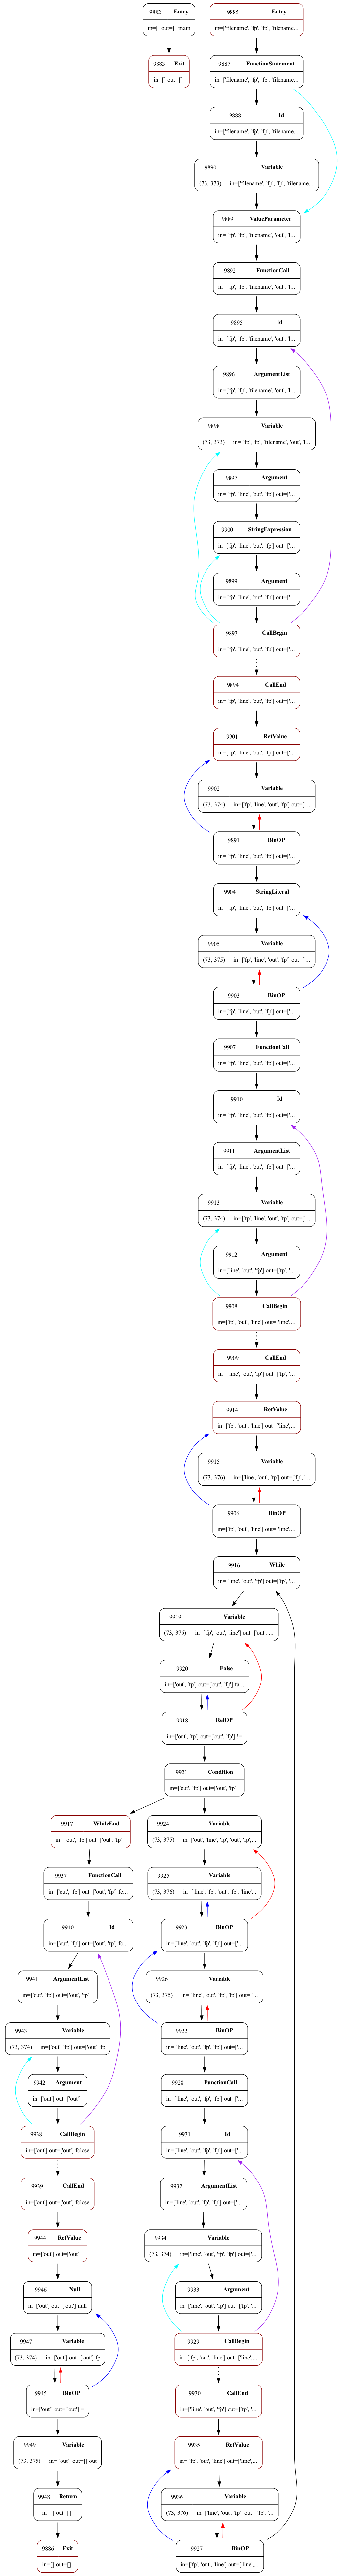

In [11]:
in_dict, out_dict = refs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

In [12]:
cfg = cfg_reader.read_cfg("../tp4/part_2/file2.php.cfg.json")

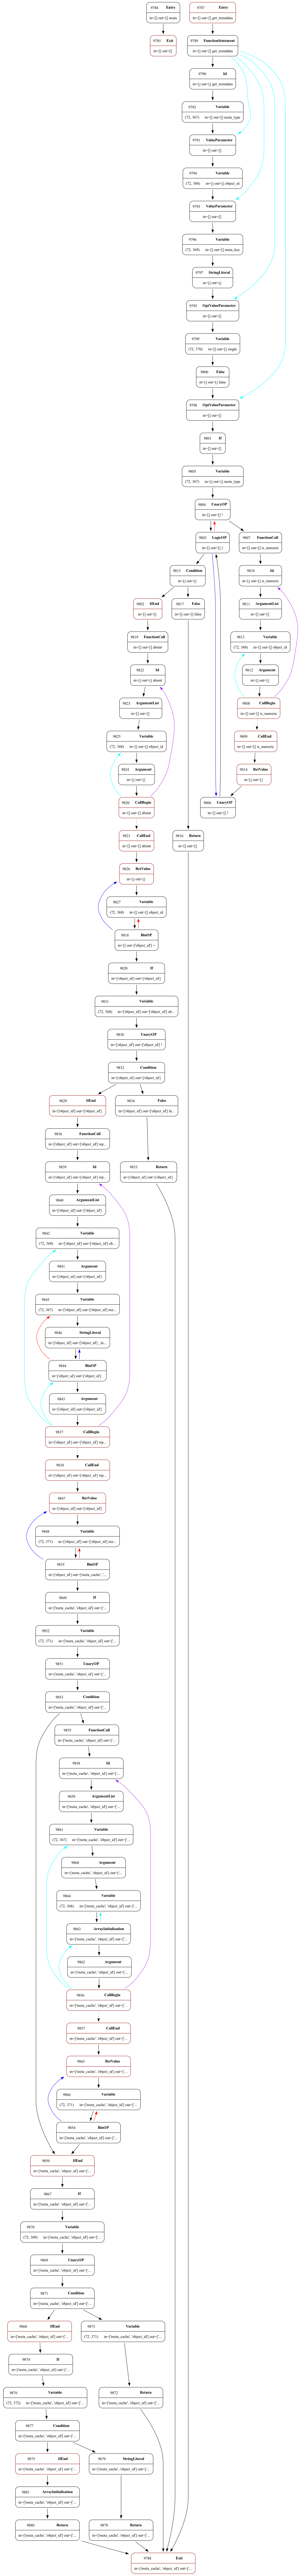

In [14]:
in_dict, out_dict = defs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

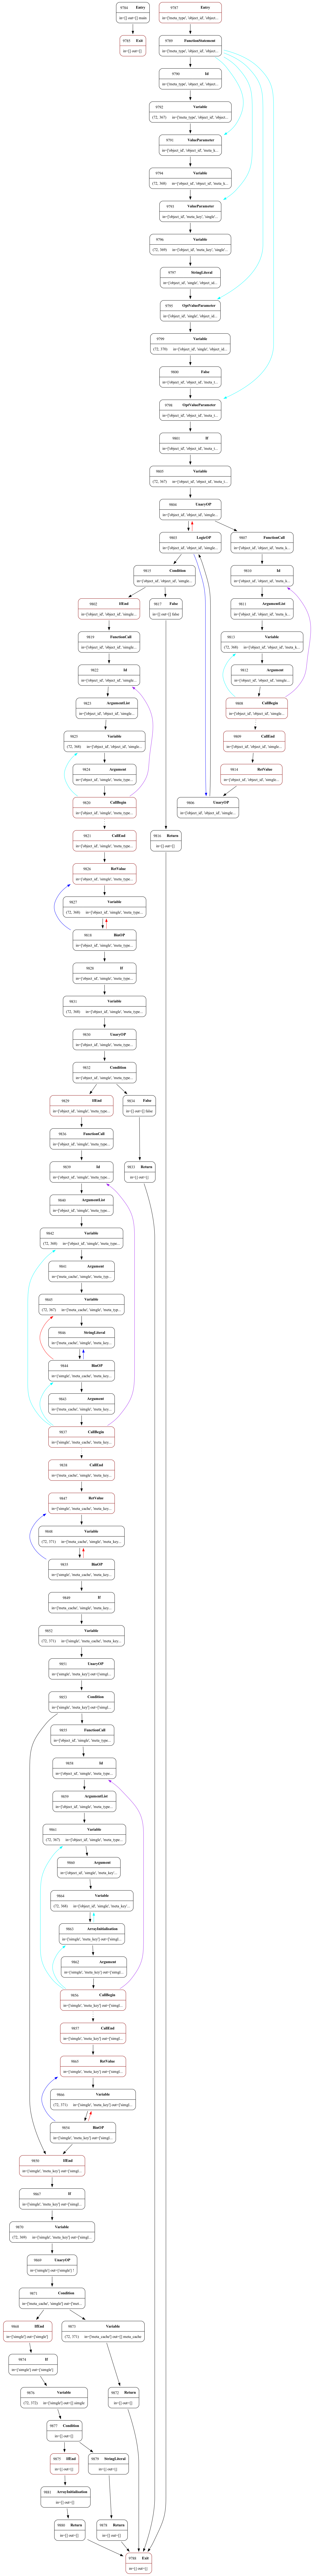

In [129]:
in_dict, out_dict = refs_dataflow(cfg)
show_in_out(cfg, in_dict, out_dict)

In [16]:
in_refs_dict, out_refs_dict = refs_dataflow(cfg)
in_defs_dict, out_defs_dict = defs_dataflow(cfg)

for nid in cfg.get_node_ids():
    refs = in_refs_dict[nid] - out_refs_dict[nid]
    defs = in_defs_dict[nid]
    for ref in refs:
        if ref not in defs:
            print(in_refs_dict[nid])
            print(out_refs_dict[nid])
            print(in_defs_dict[nid])
            print(out_defs_dict[nid])
            print(f"Undefined reference of {cfg.get_image(nid)} in node {nid}")

{9792, 9825, 9794, 9796, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
{9825, 9794, 9796, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
set()
set()
Undefined reference of meta_type in node 9792
{9825, 9794, 9796, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
{9825, 9796, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
set()
set()
Undefined reference of object_id in node 9794
{9825, 9796, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
{9825, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
set()
set()
Undefined reference of meta_key in node 9796
{9825, 9799, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
{9825, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
set()
set()
Undefined reference of single in node 9799
{9825, 9831, 9805, 9870, 9842, 9876, 9845, 9852}
{9825, 9842, 9876, 9845, 9831, 9852, 9870}
set()
set()
Undefined reference of meta_type in node 9805
{9825, 9831, 9870, 9842, 9876, 9813, 9845, 9852}
{9825, 9842, 9876, 9845, 9831, 9852, 9870}
set()
set()
Undefined reference of object_

In [47]:
cfg = cfg_reader.read_cfg("../tp4/part_2/file3.php.cfg.json")

In [48]:
in_dict, out_dict = defs_dataflow(cfg)
# show_in_out(cfg, in_dict, out_dict)

In [ ]:
in_dict, out_dict = refs_dataflow(cfg)
# show_in_out(cfg, in_dict, out_dict)